In [1]:
#!pip install imbalanced-learn==0.6.2

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('datasets/TrainEncoded.csv')
df.head()

,Rating,Reviews,Type,SizeNew,InstallsNew,PriceNew,LastUpdatedNewYear,LastUpdatedNewMonth,LastUpdatedNewDay,AndroidVerNew,...,Genres_Strategy;Education,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,1.0,149723,0,0.041000,10000000,0.0,2018,6,13,4.000000,...,0,0,0,1,0,0,0,0,0,0
1,0.0,853,0,0.340000,100000,0.0,2018,3,22,4.100000,...,0,0,0,0,0,0,0,0,0,0
2,1.0,61881,0,0.372354,5000000,0.0,2018,4,10,3.831783,...,0,0,0,0,0,0,0,0,0,0
3,0.0,21943,0,0.023000,5000000,0.0,2016,10,19,2.300000,...,0,1,0,0,0,0,0,0,0,0
4,1.0,6,0,0.092000,1000,0.0,2018,1,24,4.100000,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def value_counts_graphs(df, y, column_name):
    abs_vals = y.value_counts()
    label_freq = y.value_counts() / len(df)
    plotting = label_freq.sort_values(ascending=False).plot.bar()
    plt.title(column_name)
    return abs_vals, label_freq, plotting

(1.0    4317
 0.0    1471
 Name: Rating, dtype: int64,
 1.0    0.745853
 0.0    0.254147
 Name: Rating, dtype: float64,
 <AxesSubplot:title={'center':'Rating'}>)

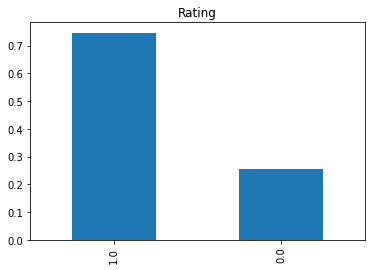

In [5]:
value_counts_graphs(df, df['Rating'], 'Rating')

## SMOTE para imbalanceo

In [6]:
X = df.drop('Rating', axis = 1)
y = df [['Rating']]
len(X)

5788

In [7]:
len(y)

5788

In [8]:
oversampling = SMOTE()
X_oversample, y_oversample = oversampling.fit_resample(X,y)

In [9]:
len(X_oversample)

8634

In [10]:
X_oversample.head()

,Reviews,Type,SizeNew,InstallsNew,PriceNew,LastUpdatedNewYear,LastUpdatedNewMonth,LastUpdatedNewDay,AndroidVerNew,ReviewGroupNew,...,Genres_Strategy;Education,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,149723,0,0.041000,10000000,0.0,2018,6,13,4.000000,3,...,0,0,0,1,0,0,0,0,0,0
1,853,0,0.340000,100000,0.0,2018,3,22,4.100000,1,...,0,0,0,0,0,0,0,0,0,0
2,61881,0,0.372354,5000000,0.0,2018,4,10,3.831783,3,...,0,0,0,0,0,0,0,0,0,0
3,21943,0,0.023000,5000000,0.0,2016,10,19,2.300000,2,...,0,1,0,0,0,0,0,0,0,0
4,6,0,0.092000,1000,0.0,2018,1,24,4.100000,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_oversample.head()

,Rating
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


In [12]:
df2 = pd.read_csv('datasets/TrainOutliersNormalization.csv')
X2 = df2.drop('Rating', axis = 1)
y2 = df2 [['Rating']]
X2_oversample, y2_oversample = oversampling.fit_resample(X2,y2)
y2_oversample.head()
len(y2_oversample)

3494

In [13]:
X_oversample.to_csv('datasets/X_oversample.csv', index= False)
y_oversample.to_csv('datasets/y_oversample.csv', index= False)

In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [15]:
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o',over), ('u',under )]
pipeline = Pipeline(steps = steps)
pipeline

Pipeline(steps=[('o', SMOTE(sampling_strategy=0.4)),
                ('u', RandomUnderSampler(sampling_strategy=0.5))])

In [20]:
X_over_under_sample, y_over_under_sample = pipeline.fit_resample(X,y
                                                    )

In [22]:
len(X_over_under_sample)

5178

(1.0    3452
 0.0    1726
 Name: Rating, dtype: int64,
 1.0    0.666667
 0.0    0.333333
 Name: Rating, dtype: float64,
 <AxesSubplot:title={'center':'Rating'}>)

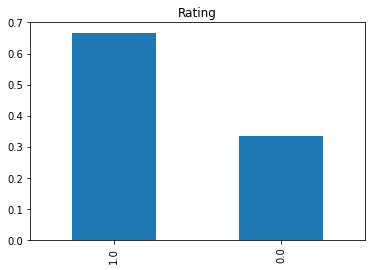

In [23]:
value_counts_graphs(X_over_under_sample,y_over_under_sample['Rating'],'Rating')

In [35]:
from sklearn.model_selection import cross_val_score, RepeatedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np
model = DecisionTreeClassifier()
cv = KFold(n_splits= 10)
scores = cross_val_score(model, X, y, scoring='f1', cv = cv, n_jobs= -1)
print(f'Mean F1 score - Oversample: {np.mean(scores)}')
scores

Mean F1 score - Oversample: 0.785013112068306


array([0.80865604, 0.79146919, 0.79064327, 0.79058824, 0.79123414,
       0.76760563, 0.78321678, 0.75321637, 0.78646441, 0.78703704])

In [31]:
cv = KFold(n_splits= 10)
scores = cross_val_score(model, X_oversample, y_oversample, scoring='f1', cv = cv, n_jobs= -1)
print(f'Mean F1 score: {np.mean(scores)}')
scores

Mean F1 score: 0.5350156880542468


array([0.78651685, 0.78304239, 0.76683087, 0.75980392, 0.75      ,
       0.75827815, 0.7456847 , 0.        , 0.        , 0.        ])

In [32]:
cv = KFold(n_splits= 10)
scores = cross_val_score(model, X_over_under_sample, y_over_under_sample, scoring='f1', cv = cv, n_jobs= -1)
print(f'Mean F1 score: {np.mean(scores)}')
scores

Mean F1 score: 0.5765561675572943


array([0.        , 0.        , 0.        , 0.7381317 , 0.82539683,
       0.82937853, 0.85144124, 0.83069977, 0.83558559, 0.85492802])

In [40]:
X_over_under_sample.to_csv('datasets/X_over_under_sample.csv', index=False)
y_over_under_sample.to_csv('datasets/y_over_under_sample.csv', index=False)

In [37]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
model = CatBoostClassifier()
cv = KFold(n_splits= 10)
scores = cross_val_score(model, X, y, scoring='f1', cv = cv, n_jobs= -1)
print(f'Mean F1 score - Oversample: {np.mean(scores)}')
scores

Mean F1 score - Oversample: 0.8520100640338212


array([0.85981308, 0.84665227, 0.85259809, 0.86016949, 0.83837331,
       0.84566596, 0.84388186, 0.86666667, 0.83491062, 0.87136929])

In [38]:
cv = KFold(n_splits= 10)
scores = cross_val_score(model, X_oversample, y_oversample, scoring='f1', cv = cv, n_jobs= -1)
print(f'Mean F1 score - Oversample: {np.mean(scores)}')
scores

Mean F1 score - Oversample: 0.585064882433741


array([0.84598047, 0.83307573, 0.83548143, 0.83696469, 0.81916538,
       0.83866058, 0.84132055, 0.        , 0.        , 0.        ])

In [39]:
cv = KFold(n_splits= 10)
scores = cross_val_score(model, X_over_under_sample, y_over_under_sample, scoring='f1', cv = cv, n_jobs= -1)
print(f'Mean F1 score - Oversample: {np.mean(scores)}')
scores

Mean F1 score - Oversample: 0.6297901740282146


array([0.        , 0.        , 0.        , 0.87847731, 0.9037037 ,
       0.90832455, 0.90021231, 0.90137858, 0.90697674, 0.89882854])